In [2]:
import glob
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [26]:
training = glob.glob('./testrun*.csv')

In [27]:
training

['./testrun_early10.csv',
 './testrun_stage3.csv',
 './testrun_stage1.csv',
 './testrun_stage5.csv',
 './testrun_stage2.csv']

In [28]:
data = []
df = pd.read_csv('./testrun_early10.csv').rename(columns={'Unnamed: 0': 'iteration'})
df['type'] = '1st model'
data.append(df)
df = pd.read_csv('./testrun_stage1.csv').rename(columns={'Unnamed: 0': 'iteration'})
df['type'] = '2nd model'
data.append(df)
df = pd.read_csv('./testrun_stage2.csv').rename(columns={'Unnamed: 0': 'iteration'})
df['type'] = '3rd model'
data.append(df)
df = pd.read_csv('./testrun_stage3.csv').rename(columns={'Unnamed: 0': 'iteration'})
df['type'] = '4th model'
data.append(df)
df = pd.read_csv('./testrun_stage5.csv').rename(columns={'Unnamed: 0': 'iteration'})
df['type'] = '5th model'
data.append(df)
data = pd.concat(data)

In [29]:
grouped = data.groupby('type')

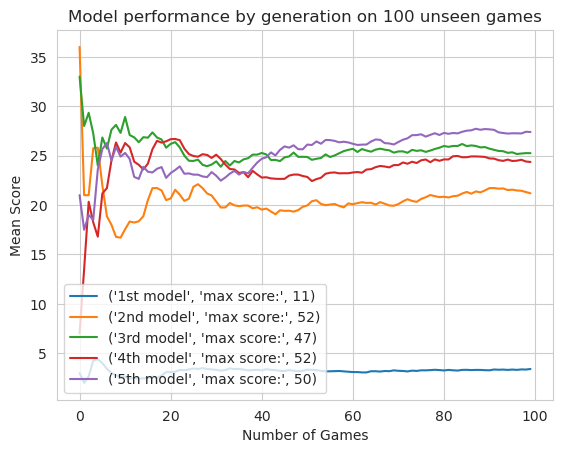

In [34]:
plt.clf()
plt.title('Model performance by generation on 100 unseen games')
plt.xlabel('Number of Games')
plt.ylabel('Mean Score')
legend_labels = []
for hash, g in grouped:
    plt.plot(g['mean_scores'])
    legend_labels.append((g['type'].values[0], 'max score:', g['scores'].max()))
plt.legend(legend_labels, loc='lower left')
plt.show()

In [65]:
g['mean_scores'].max()

7.418768920282543

In [66]:
g.loc[g['mean_scores'] == 7.418768920282543]

,iteration,ts,scores,mean_scores,game_hash,starting_timestamp,negative_reward,positive_reward,seed,how_many_seeds,how_many_games,number_of_layers,speed
990,990,1.704568e+09,14,7.418769,63dd216ecd9066dca6bf18e59f0d5bfb594d9877367732...,1.704575e+09,-10,27,100,100,100,512,1000


In [13]:
best_model = pd.read_csv('stage2_test_best.csv')
second_model = pd.read_csv('stage2_test_final.csv')

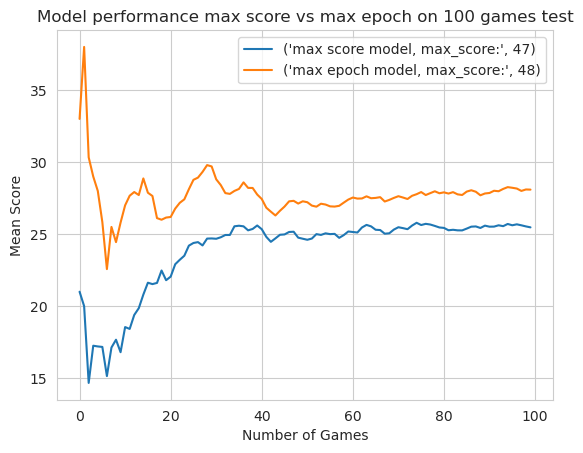

In [14]:
plt.clf()
plt.title('Model performance max score vs max epoch on 100 games test')
plt.xlabel('Number of Games')
plt.ylabel('Mean Score')
legend_labels = []
plt.plot(best_model['mean_scores'])
legend_labels.append(('max score model, max_score:', best_model['scores'].max(),
                     ))
plt.plot(second_model['mean_scores'])
legend_labels.append(('max epoch model, max_score:', second_model['scores'].max(),
                     ))
#print(g)
plt.legend(legend_labels)
plt.show()